# Introduction


Contributor Sebastián Lepe - 2021

Before we begin with this user guide, we will asume the reader has already finished the tutorial notebook. How ever, a summary is included here because the functions are long and hard to memorize. Also, some objects and functions of our own classes are explained.

<small> Note: To use the notebook please download the zip file. </small>

## Summary

<ol>
    <li> Read binary file</li>
    <li> Quickview </li>
    <li> Stream lines </li>
    <li> Blending images </li>
    <li> Particles, Scenes and Render</li>
</ol>

### 1. Read Binary File

To read the binary files we use the function 'read' of the 'read_binary_snap.py' file. The function only takes the path of the file, if you dont have any snapshot, this user guide has a snapshot for testing in 'test_file' folder. If you want to use any other function, feel free to do so.

In [8]:
from read_binary_snap import read
from sphviewer.tools import QuickView


path = 'test_file/snap_050.gz'
header, data, info = read(path)

print(header.keys(), '\n')
print(data.keys(), '\n')

dict_keys(['npart', 'massarr', 'time', 'redshift', 'flag_sfr', 'flag_feedback', 'npartTotal', 'flag_cooling', 'num_files', 'BoxSize', 'Omega0', 'OmegaLambda', 'HubbleParam', 'flag_stellarage', 'flag_metals', 'npartTotalHighWord', 'flag_entropy_instead_u', 'flag_doubleprecision', 'flag_ic_info', 'lpt_scalingfactor', 'fill', 'names']) 

dict_keys(['PartType0', 'PartType1', 'PartType2', 'PartType3', 'PartType4']) 



<br>
Every snap file has diferents values in dictionaries, to save up some time in the file 'classes.py', the SnapViewer object read and saves all the information. You can also save it by hand. It's important to consider that the file 'classes.py' is not finished so it may be outdated by the time you read this notebook.

In [2]:
from classes import SnapViewer

path = 'test_file/snap_050.gz'
snap = SnapViewer(path)
snap.get_keys()

Header: ['npart', 'massarr', 'time', 'redshift', 'flag_sfr', 'flag_feedback', 'npartTotal', 'flag_cooling', 'num_files', 'BoxSize', 'Omega0', 'OmegaLambda', 'HubbleParam', 'flag_stellarage', 'flag_metals', 'npartTotalHighWord', 'flag_entropy_instead_u', 'flag_doubleprecision', 'flag_ic_info', 'lpt_scalingfactor', 'fill', 'names']

Part Type 0 : ['InternalEnergy', 'Density', 'ne1', 'nh', 'SmoothingLength', 'StarFormationRate', 'ElementAbundance', 'speciesKrome', 'gammaKrome', 'muKrome', 'ArtViscosityCoef', 'ArtConductivityCoef', 'EnergySN', 'EnergySNCold', 'ID', 'Coordinates', 'Velocity', 'Mass']

Part Type 1 : ['ID', 'Coordinates', 'Velocity', 'Mass']

Part Type 2 : ['ID', 'Coordinates', 'Velocity', 'Mass']

Part Type 3 : ['ID', 'Coordinates', 'Velocity', 'Mass']

Part Type 4 : ['StellarFormationTime', 'ElementAbundance', 'EnergySN', 'EnergySNCold', 'ID', 'Coordinates', 'Velocity', 'Mass']


<br>
You can access the information with the 'snap.part' dictionary, that takes the part type and the key of the value you want.

<br>

In [7]:
snap.mass[0].shape

(86551, 1)

In [9]:
snap.part[0]['ID']

array([71101, 79029, 80817, ..., 89675, 72809, 79186], dtype=uint32)

Also, for convience, the SnapViewer class counts with pre maid lists for positions, mass and velocities of each part type.

In [11]:
pos = snap.pos[4] #coordinates part type 4
mass = snap.mass[2] #mass part type 2
vels = snap.vels[0] #velocities part type 0

The class also counts with other functions to save up time, these are explain within this notebook.

### 2. QuickView


QuickView, part of sphviwer-tools, is a particle render object, that takes the position of N particles, color by their mass and display an image. It supports the folowing arguments:

<ul>
    <li>pos: array with the position of the particles with shape (N,3) </li>
    <li>mass: <b>(optional)</b> (N) shape array with the mass values of each particles, np.ones by default</li>
    <li>hsml:<b>(optional)</b> array with smoothing lengths values, if not given is calcultated.</li>
    <li>nb:<b>(optional)</b> number of neighbours to use for the smoothing lengths calculation, 32 by default</li>
    <li>logscale:<b>(optional)</b> set the output image with logscale, default True</li>
    <li>plot: <b>(optional)</b> display a plot of the image with plt.imshow, default True </li>
    <li>min_hsml / max_hsml: <b>(optional)</b> physical values of the minimum / maximum 
           smoothing lengths</li>
    <li> Camera params: <b>(optional)</b> parameters of the camara, more detail in the Scene section. The most basics are:
        <ul>
            <li>
                r: distance of the camera,'infinity' or integer, set autocamera values by default
            </li>
            <li>extent: extent of the image, list type [xmin,xmax,ymin,ymax] </li>
            <li>(x,y,z): point where the camera is centered </li>
            <li>t/p/roll: diferents angles of the camera </li>
        </ul>
    </li>
</ul>

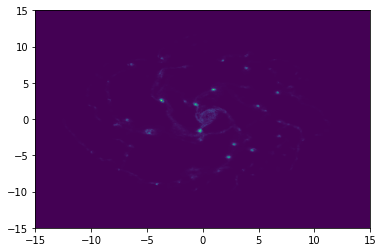

In [85]:
from sphviewer.tools import QuickView

pos = snap.pos[0]
mass = snap.mass[0]
extent = [-15,15,-15,15]
x,y,z = (25,0,0)
qv = QuickView(r='infinity', pos=pos, mass=mass, x=x, y=y, z=z, extent=extent)

The QuickView object has the following functions:

<ul> 
    <li>get_image: returns the generated image </li>
    <li> get_extent: returns the extent of the image </li>
    <li> get_hsml: returns the hsml calculated for the particules </li>
    <li> imshow: display an image</li>
    <li> imsave: saves the image with the given parameters</li>
</ul>
    

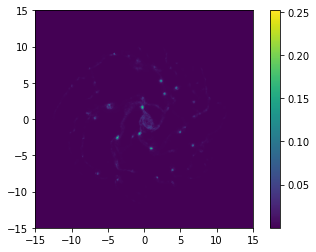

In [28]:
import matplotlib.pyplot as plt

img = qv.get_image()
extent_ = qv.get_extent()

plt.figure()
plt.imshow(img, extent=extent_)
plt.colorbar()
plt.show()

The class SnapViewer counts with all of the basics sphviewer functions, mainly to avoid so many imports. 

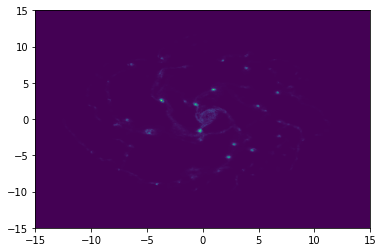

In [27]:
qv = snap.quickview(r='infinity', pos=pos, mass=mass, x=x,y=y,z=z, extent=extent)

This easy tool may be use to create nice looking videos changing the paremeters of the camera. As an example, we display the evolution of 100 snaps and diferents camera values.

 <img src="media/dinamic.gif" width="400" hight="400">
 
The example of more dinamic videos are shown later on this notebook.

### 3. Stream Lines

Because the particles are colored by their mass, we can use that to show differents properties. One of the most used is the Stream lines for the velocity fiels.

The velocity fields can be obteind with QuickView, using the velocity of the desired axis instead of the mass. 

To see a more detail explanation, return to the tutorial.

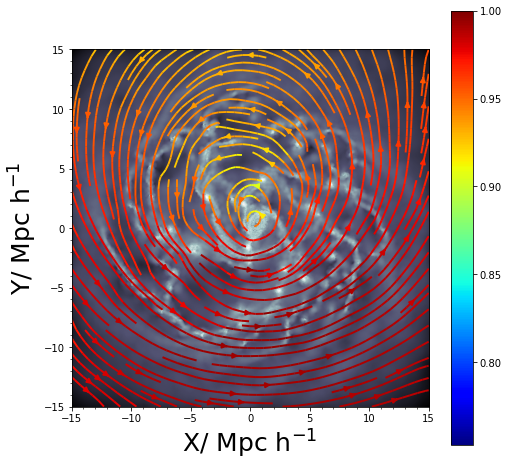

In [42]:
import numpy as np

vel = snap.vels[0] #velocities of the part type 0
extent = [-15,15,-15,15]

qv = QuickView(r='infinity', pos=pos, mass=mass, x=x, y=y, z=z, extent=extent, plot=False, logscale=False)
hsml = qv.get_hsml()
density_field = qv.get_image()

vfield = []
for i in range(2):
    qv1 = QuickView(pos, vel[:,i], hsml=hsml, r='infinity', x=x,y=y,z=z,
                   plot=False, extent=extent, logscale=False)
    vfield.append(qv1.get_image() / density_field)
    
fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111)
X = np.linspace(extent[0], extent[1], 500)
Y = np.linspace(extent[2], extent[3], 500) 
ax.imshow(np.log10(density_field), origin='lower', extent=extent, cmap='bone')
v = np.log10(np.sqrt(vfield[0] ** 2 + vfield[1] ** 2)) #modulo de velocidad
color = v / np.max(v)
lw = color * 2
streams = ax.streamplot(X, Y, vfield[0], vfield[1], color=color,
    density=1.5, cmap='jet', linewidth=lw, arrowsize=1)
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.minorticks_on()
ax.set_xlabel(r'$\rm X / \ Mpc \ h^{-1}$', size=25)
ax.set_ylabel(r'$\rm Y / \ Mpc \ h^{-1}$', size=25)
fig.colorbar(streams.lines)
plt.show()

To get a more even vfield, you can subtract the center of mass velocity and multiplied by the total mass.

The calculation for center of mass velocity can be done by hand or using the function 'centroid' of the SnapViewer class. This functions returns the center of mass position if the positions list if given or the center of mass velocity if the velocities list is given.

In [45]:
rcm_v = snap.centroid(snap.vels)
rcm_v

array([101.85185342,  -2.03456826,   2.08431281])

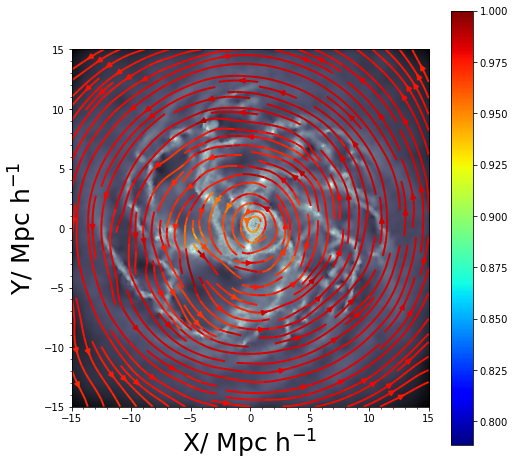

In [47]:
tm = sum(snap.mass[0]) #total mass of the part type 0

qv = QuickView(r='infinity', pos=pos, mass=mass, x=x, y=y, z=z, extent=extent, plot=False, logscale=False)
hsml = qv.get_hsml()
density_field = qv.get_image()

vfield = []
for i in range(2):
    qv1 = QuickView(pos, (vel[:,i]- rcm_v[i]) * tm, hsml=hsml, r='infinity', x=x,y=y,z=z,
                   plot=False, extent=extent, logscale=False)
    vfield.append(qv1.get_image() / density_field)
    
fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111)
X = np.linspace(extent[0], extent[1], 500)
Y = np.linspace(extent[2], extent[3], 500) 
ax.imshow(np.log10(density_field), origin='lower', extent=extent, cmap='bone')
v = np.log10(np.sqrt(vfield[0] ** 2 + vfield[1] ** 2)) 
color = v / np.max(v)
lw = color * 2
streams = ax.streamplot(X, Y, vfield[0], vfield[1], color=color,
    density=1.5, cmap='jet', linewidth=lw, arrowsize=1)
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.minorticks_on()
ax.set_xlabel(r'$\rm X / \ Mpc \ h^{-1}$', size=25)
ax.set_ylabel(r'$\rm Y / \ Mpc \ h^{-1}$', size=25)
fig.colorbar(streams.lines)
plt.show()

Like it was said before, the SnapViewer class has some functions to save up some time, one of each is the 'velocity_field' function, witch only takes the extent of the image you want, to display the velocity fields of all party types saved.

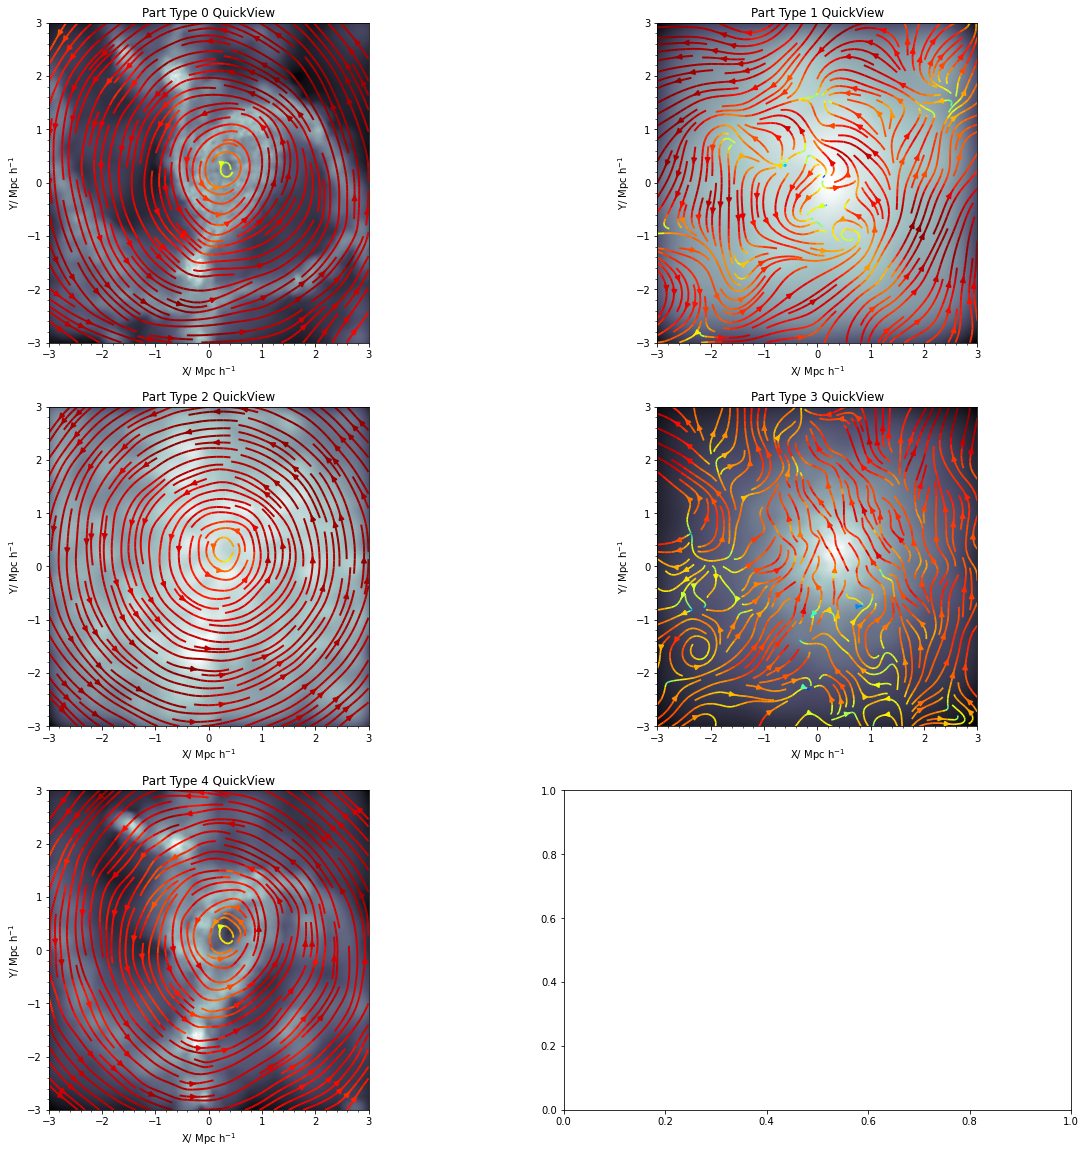

In [49]:
snap.velocity_field([-3,3,-3,3])
#a small extent is used to prevent an error in the part type 4 velocity field
#feel free to experiment with diferents values for the extent.

This stream lines can be animated, using matplotlib.animation and a secuence of 202 snapshots i get this test animations for the part type 0 and the part type 3.

<div style=display:flex;>
    <img src="media/p0_streamlines.gif" width="500" hight="500">
    <img src="media/p3_streamlines.gif" width="500" hight="500">
</div>

The file 'classes.py' also comes with the class SnapEvolution, that reads n snapshots and has some usefulls functions, like the one i use to make the animations above called 'vfield_animation'. Examples of this class are shown later.

## 4. Blending Images

Sph Viewer comes with functions to combine two rgb images using 2 diferents methods, Screen and Overlay. This images most be save before blending because of how the program works.

Deciding which one to use is only a thing of personal preference for each image.

Text(0.5, 1.0, 'Blend Screen')

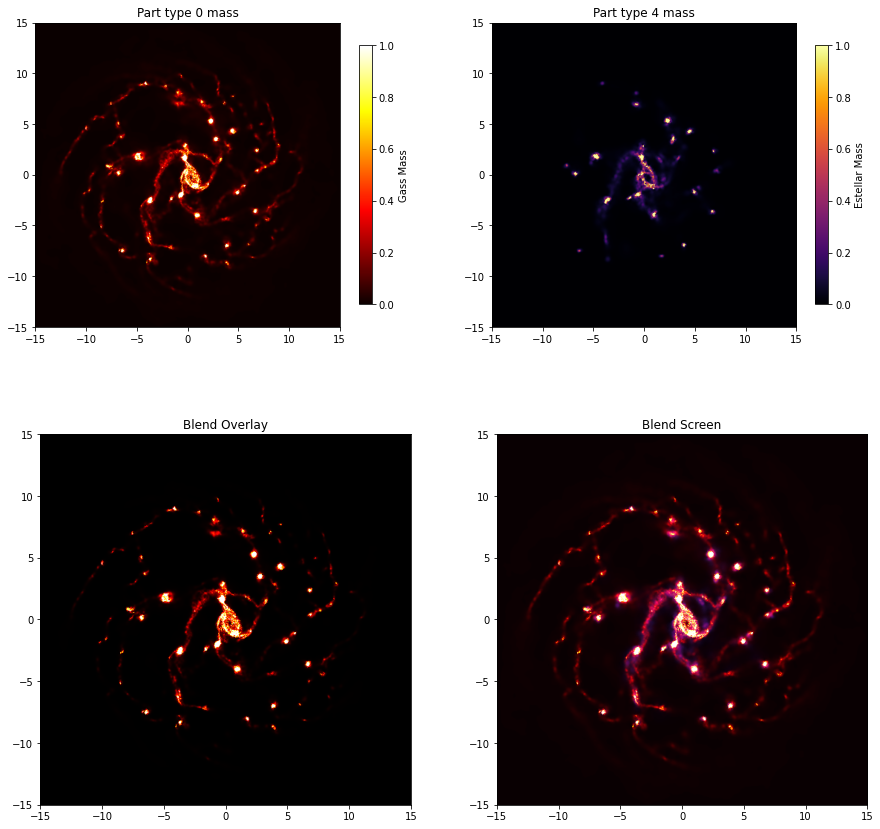

In [71]:
from sphviewer.tools import Blend
import matplotlib.gridspec as gridspec

extent = [-15,15,-15,15]
x,y,z = snap.centroid(snap.pos) #position of the center of mass

qv1 = snap.quickview(r='infinity', pos=snap.pos[0], mass=snap.mass[0], x=x,y=y,z=z, extent=extent,
                    plot=False) 
qv2 = snap.quickview(r='infinity', pos=snap.pos[4], mass=snap.mass[4], x=x,y=y,z=z, extent=extent,
                    plot=False)

img1 = qv1.get_image()# image of part type 0
img2 = qv2.get_image()#image of part type 4

vmin1, vmax1 = snap.get_v(img1, 1.5, 0.1)
vmin2, vmax2 = snap.get_v(img2, 1.5, 0.09)

#save the images with diferents cmaps
plt.imsave('media/blend_1.png',img1, dpi=100, cmap='hot', vmin=vmin1, vmax=vmax1)
plt.imsave('media/blend_2.png',img2, dpi=100, cmap='inferno', vmin=vmin2, vmax=vmax2)

#read the images
img1_b = plt.imread('media/blend_1.png')
img2_b = plt.imread('media/blend_2.png')

#combine the images
blend = Blend.Blend(img1_b, img2_b)
output1 = blend.Overlay()
output2 = blend.Screen()

fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2, 2)

axs = []
for i in range(2):
    for u in range(2):
        ax=fig.add_subplot(gs[i, u])
        axs.append(ax)

plot1 = axs[0].imshow(img1_b, extent=extent, cmap='hot')
axs[0].set_title('Part type 0 mass')
cbar = fig.colorbar(plot1, shrink=0.7, ax=axs[0], spacing='proportional')
cbar.set_label('Gass Mass')

plot2 = axs[1].imshow(img2_b, extent=extent, cmap='inferno')
axs[1].set_title('Part type 4 mass')
cbar = fig.colorbar(plot2, shrink=0.7, ax=axs[1], spacing='proportional')
cbar.set_label('Estellar Mass')

axs[2].imshow(output1, extent=extent)
axs[2].set_title('Blend Overlay')
axs[3].imshow(output2, extent=extent)
axs[3].set_title('Blend Screen')

Animations with blends can be maid, and example is this gif with blends of Part type 0 (gas) mass and Part Type 4 (star) mass showing the evolution of 202 snaps.

<br>
<div style=display:flex;>
    <img src="media/estrellas3.gif" width="300" hight="300">
</div>

## 5. Particles, Scenes and Render


As was said before, QuickView store particles positions and mass, creates and scene with the camera params and renders an image, If we want to make a video or just shown diferents parts of a snapshot, it can be done faster if we save the particles and just update the scene for each image.

Sph comes with the objects: Particles, that store the particles positions and their mass; Scene, that store the camera params; and Render, that render an image with the scene set before.

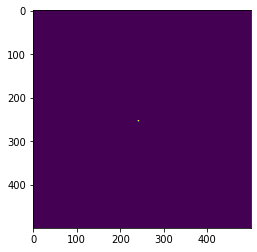

In [83]:
from sphviewer import Particles, Scene, Render

pos = snap.pos[0]
mass = snap.mass[0]
particles = Particles(pos, mass) #save the particles of the part type 0

scene = Scene(particles) #create an scene
render = Render(scene)
img = render.get_image()

vmin, vmax = snap.get_v(img, 1, 0.09)
plt.imshow(img, vmin=vmin, vmax=vmax)

The render of the images has the default values, we can access the camera params using a function of the Camera object.

In [77]:
scene.Camera.get_params()

{'x': 210.4754638671875,
 'y': -106.385498046875,
 'z': 17.3238525390625,
 'r': 6074.560367867858,
 't': 0,
 'p': 0,
 'zoom': 1,
 'roll': 0,
 'xsize': 500,
 'ysize': 500,
 'extent': None}


<small>Note: To see the full extention of the functions in every object of SphViwer, read the github documentation.</small>

We can change de camera params updating the scene object.

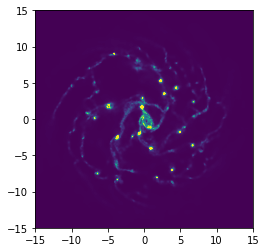

In [81]:
x,y,z = snap.centroid(snap.pos)
r='infinity'
extent=[-15,15,-15,15]
scene.update_camera(r=r, extent=extent, x=x,y=y,z=z)

render = Render(scene)
img = render.get_image()
vmin, vmax = snap.get_v(img, 1, 0.09)
plt.imshow(img, extent=extent, vmin=vmin, vmax=vmax)

This particles-scene-render updating can be use to show diferent parts of an image and make the movie more dynamic.

3 Gifs, changing the values of the angles p-t-roll are shown as example.

In [5]:
#only one of the 3 gifs is shown here, for the others only replace p-t-roll
from sphviewer import Particles, Scene, Render

particles = Particles(snap.pos[0], snap.mass[0])
x,y,z = snap.centroid(snap.pos)
extent = [-15,15,-15,15]
r = 'infinity'

scene = Scene(particles)
scene.update_camera(r=r, extent=extent, x=x,y=y,z=z)

for i in range(360):
    render = Render(scene)
    img = render.get_image()
    vmin, vmax = snap.get_v(img, 1, 0.5)
    plt.imsave('imgs/img_' + str('%03d.png'%i), img, dpi=200, vmin=vmin, vmax=vmax, cmap='bone')
    scene.update_camera(roll=i)

To save a gif or video, we use OpenCv, that takes a folder with ordered images and concatenates them into a video, or gif with Imageio. The class SnapEvolution comes with functions for this 2 options. A more deep explanation of this class is shown later.

In [98]:
from classes import SnapEvolution

data = SnapEvolution('', 0)

path1 = 'imgs/' #folder with the images
path2 = 'media/varying_roll2' #folder where save the gif

data.save_gif(path1, path2)

<table>
    <tr>
        <th> <h2> Varying p</h2> </th>
        <th> <h2> Varying t</h2> </th>
        <th> <h2> Varying roll</h2></th> 
    </tr>
    <tr>
        <th>
            <img src="media/varying_p.gif" width="300" hight="300">
        </th>
        <th>    
            <img src="media/varying_t.gif" width="300" hight="300">
        </th>
        <th>
            <img src="media/varying_roll2.gif" width="300" hight="300">
        </th>  
    </tr>
    
</table>
    

The center of the camera, the distance, the zoom, and the angles can be updated to create a less bland video.

# Image analisys

Getting done with the tutorial, we can explore the usefullness of this program through display diferentes properties of the N-body simulation. A few examples are shown here, the fraction of h2 and the oxygen abundance present in the test snapshot. 

## H2 fraction

To display this particular propertie, we only can do it on the part types that have the 'speciesKrome' key. This array comes with the mass of the following chemical species: (e,H,H-,H+,H2,H2+,HE,HE+,HE++,C,C+,O,O+,Si,Si+,Si++), in that particular order.


To get the fraction of h2, we use the equation: $$ \frac{mass_{H2}}{mass_{tot}} $$


The easy way to do this is just change the input of the mass in quickview for the value you want to display.

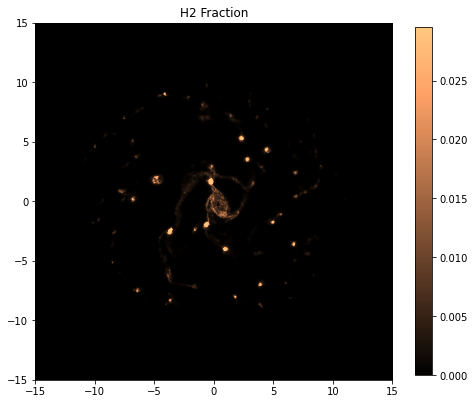

In [23]:
import matplotlib.pyplot as plt
from classes import SnapViewer

snap = SnapViewer('test_file/snap_050.gz')

h2_mass = snap.part[0]['speciesKrome'][:,4]
t_mass = sum(snap.mass[0])

extent = [-15,15,-15,15]
x,y,z = snap.centroid(snap.pos)
qv = snap.quickview(r='infinity', pos=snap.pos[0], mass=h2_mass/t_mass, extent=extent, x=x,y=y,z=z,
                   plot=False)
img = qv.get_image()
vmin, vmax = snap.get_v(img, 1, 0.2)

plt.figure(figsize=(8,8))
plt.imshow(img, extent=extent, vmin=vmin, vmax=vmax, cmap='copper')
plt.colorbar(shrink=0.8)
plt.title('H2 Fraction')
plt.show()

## Oxygen Abundance

For this property we need the mass of the oxigen on each particle, this information comes in 'ElementAbundance'. This arrays comes in the following order: 3He, 12C, 24Mg, 16O, 56Fe, 28Si, H, 14N, 20Ne, 32S, 40Ca, 62Zn.


The ecuation used for this calculation is: $$ 12+log_{10}(\frac{mass_{O16}}{16})- log_{10}(mass_H) $$

<small> Note: This time the calculation was made with the resulting images, not the masses on the arrays. </small>

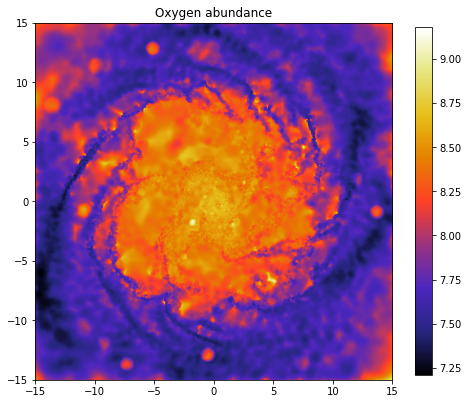

In [88]:
ox_mass = snap.part[0]['ElementAbundance'][:,3]
h_mass = snap.part[0]['ElementAbundance'][:,6]

extent = [-15,15,-15,15]

ox_qv = snap.quickview(r='infinity', pos=snap.pos[0], mass=ox_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                    logscale=False, nb=15)
h_qv = snap.quickview(r='infinity', pos=snap.pos[0], mass=h_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                    logscale=False, nb=15)


ox_img = ox_qv.get_image()
h_img = h_qv.get_image()
ox_ab = 12 + np.log10(ox_img/16) - np.log10(h_img)

x,y,z = snap.centroid(snap.pos)
vmin, vmax = snap.get_v(ox_ab, 1, 1)

plt.figure(figsize=(8,8))
plt.imshow(ox_ab, extent=extent, cmap='CMRmap', vmin=vmin, vmax=vmax)
plt.colorbar(shrink=0.8)
plt.title('Oxygen abundance')
plt.show()



<div style=display:flex;>
    <img src="media/ox_ab4.gif" width="500" hight="500">
    <img src="media/ox_ab.gif" width="500" hight="500">

</div>


r=10-400 // r=100

# Evolution of a Simulation

As showed before, it's possible to create a movie with the evolution of a simulation, to do this you need a serie of snaps to read and just save the images you want to display.

Our own personal classes that were used before but weren't explaind properly were SnapViewer and SnapEvolution. 

### SnapViewer

SnapViewer saves all the information on a snapshot file and provides an easy acces to it. Also comes with some usefull functions:

<ul>
    <li> sphviewer basics functions: To avoid so many imports, this class comes with quickview, particles, scene, render and blend. This functions are use in the same way as the sphviewer functions </li>
    <li> get_keys: Print the snapshot keys </li>
    <li> get_v: Return the vmin and vmax of an image multiplied by given factors</li>
    <li> interpol: Returns list with (x,y,z) positions given the initial and final points </li>
    <li> centroid: Calculate the center of mass position or the center of mass velocity depending or which list is given</li>
    <li> local_centroid: Calculate the center of mass position or velocity from a given area. I use this function to follow diferent areas on an evolution.  </li>
    <li> pos_id: Takes the id of a particle and return his position </li>
    <li> source_id: Takes a (x,y)/(x,y,z) position and return an ID from a particle near by </li>
</ul>

### SnapEvolution

This class saves the information of N snaps with a given path on SnapViewers objects. It's important that the name of the snaps are well order.

The SnapEvolution class comes with the following functions, more will be added in the future:

<ul>
    <li> add_file: Add one snap file with an absolute path </li>
    <li> see_files: Print all the files saved on the class </li>
    <li> get_keys: Display the keys of the snapshots. Same as the SnapViewer function get_keys </li>
    <li> save_gif: Function to save all the images from a folder to a gif on a given path</li>
    <li> save_video: Function to save all the images from a folder into to a movie on a given path and fps</li>
    <li> field_animation: Creates an animation of the velocity field from a given part type </li>
    <li> init_img: Initialize the figure for an imange. I use it to not have 200 figures when i make the images</li>
    <li> end_img: End of the figure </li>
    <li> show_img: Display and image with the colorbar inside, also can save it on a given path if 'save=True'</li>
    <li> transition: Animates a transition from 2 images and the quantity of frames you want </li>
    <li> vmean: Get the vmin average of the firsts 50 snaps and the vmax average of the last 50 snaps to get a static colobar </li>
    
</ul>
    

There are 2 ways to add snaps to SnapEvolution:
- Using a path to add N snapshots with a given format
- Adding the files one by one with the 'add_file' function with an absolute path


The first way try adding N files generating paths in order: (000, 001, 002,...), usefull when you want to add a list of files in order.


The second way only add a file with the given path.

In [2]:
from classes import SnapEvolution

path1 = 'test_file/snap_'
data = SnapEvolution(path1, 51, '.gz')

data2 = SnapEvolution('', 0)
path2 = 'test_file/snap_050.gz'
data2.add_file(path2)

data.see_files()
data2.see_files()

1 files added
0 files added
File added
test_file/snap_050.gz
test_file/snap_050.gz


In [1]:
from classes import SnapEvolution

path = '/home/esillero/sphviewer-sims/snaps/iso-H2/snap_'
n = 203
data = SnapEvolution(path,n)

Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_b

Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
202 files added


In [26]:
snap.get_keys()

Header: ['npart', 'massarr', 'time', 'redshift', 'flag_sfr', 'flag_feedback', 'npartTotal', 'flag_cooling', 'num_files', 'BoxSize', 'Omega0', 'OmegaLambda', 'HubbleParam', 'flag_stellarage', 'flag_metals', 'npartTotalHighWord', 'flag_entropy_instead_u', 'flag_doubleprecision', 'flag_ic_info', 'lpt_scalingfactor', 'fill', 'names']

Part Type 0 : ['InternalEnergy', 'Density', 'ne1', 'nh', 'SmoothingLength', 'StarFormationRate', 'ElementAbundance', 'speciesKrome', 'gammaKrome', 'muKrome', 'ArtViscosityCoef', 'ArtConductivityCoef', 'EnergySN', 'EnergySNCold', 'ID', 'Coordinates', 'Velocity', 'Mass']

Part Type 1 : ['ID', 'Coordinates', 'Velocity', 'Mass']

Part Type 2 : ['ID', 'Coordinates', 'Velocity', 'Mass']

Part Type 3 : ['ID', 'Coordinates', 'Velocity', 'Mass']

Part Type 4 : ['StellarFormationTime', 'ElementAbundance', 'EnergySN', 'EnergySNCold', 'ID', 'Coordinates', 'Velocity', 'Mass']


<small> Note: The 'End Of File' warnings comes from the read function on 'read_binary_snap.py'. </small>

## Simple evolution

The simples way to make an evolution movie is just to save n images of the thing you want to show. As an example, we will show the evolucion of the stars (part type 4) colored by their mass.

In [2]:
imgs = []
for snap in data.snaps:
    particle = snap.particles(snap.pos[0], snap.mass[0])#creo la particula
    scene = snap.scene(particle) #creo la escena
    
    x,y,z = snap.centroid(snap.pos) #encuentro el centro de masa
    t = 45
    r = 10
    extent = [-15,15,-15,15]
    scene.update_camera(x=x,y=y,z=z, extent=extent, r=r, t=t) #actualizo la escena
    
    render = snap.render(scene)
    imgs.append(render.get_image())

/home/slepes/projects/sph-log/classes.py:352: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0 = plt.subplot(self.gs[0, 0])


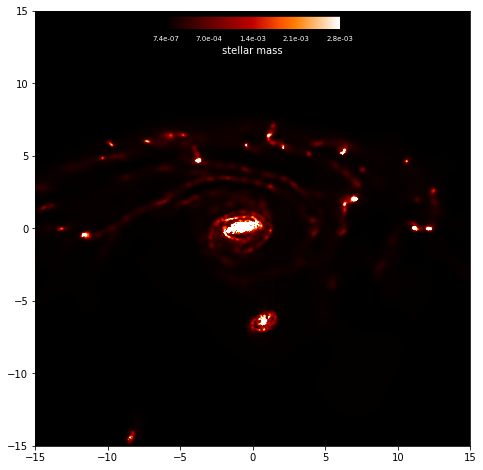

In [10]:
#set initial atributs

snap = data.snaps[0]

data.init_img()
i = 0
for img in imgs:
    vmin, vmax = snap.get_v(img, 1, 0.09)
    path = 'imgs/snap_' + str('%03d'%i)
    data.show_img(img, extent=extent, vmin=vmin, vmax=vmax, label='stellar mass', save=True, path=path,
                 cmap='gist_heat')
    i += 1
data.end_img()

Its important to notice that in this evolution, the color bar is dynamic, so to get a more deep perspective of how the mass changes, we can set fixed values.

In [41]:
vmin, vmax = data.vmean(imgs, 100)

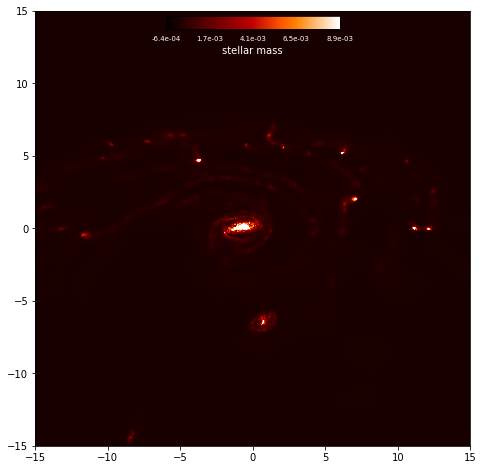

In [52]:
#we still use the images set before
    
data.init_img()
u=0
for img in imgs:
    path = 'imgs/snap_' + str('%03d'%u)
    data.show_img(img, extent=extent, vmin=vmin*-2e3, vmax=vmax*0.1, label='stellar mass', save=True, path=path,
                 cmap='gist_heat')
    u += 1
data.end_img()

In [53]:
path1 = 'imgs/'
path2 = 'media/static_bar4'
data.save_gif(path1, path2)

<div style=display:flex;>
    <img src="media/dinamic_bar.gif" width="400" hight="400">
    <img src="media/static_bar4.gif" width="400" hight="400">
</div>